## **Import the libraries** ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

df_web_test= pd.read_csv("../Data/Clean/df_final_web_data_test_clean.txt")
df_web_control= pd.read_csv("../Data/Clean/df_final_web_data_control_clean.txt")


## **Analysis** ##

## **STEPS - Control**

In [ ]:
df_web_control["process_step"].describe()

In [ ]:
sns.histplot(df_web_control['process_step'], kde=True, bins=60, color="green")
plt.show()

## **Time between steps -Test** ##

In [211]:
#Filter what we want: control condition 1, steps forward 0-1;1-2;2-3;3-4. keep_control=YES
condition_control=df_web_test["control"]==1
df_web_test_dif_time=df_web_test[condition_control]
condition_step=(df_web_test_dif_time["step_jump"]=="0-1") | (df_web_test_dif_time["step_jump"]=="1-2") | (df_web_test_dif_time["step_jump"]=="2-3") | (df_web_test_dif_time["step_jump"]=="3-4")
df_web_test_dif_time=df_web_test_dif_time[condition_step]
condition_keep=df_web_test_dif_time["keep_contol"]=="YES"
df_web_test_dif_time=df_web_test_dif_time[condition_keep]
df_web_test_dif_time
df_web_test_dif_time

In [4]:
df_web_test_dif_time["total_seg"].describe()

count    103496.000000
mean         58.681205
std         102.058354
min           0.000000
25%          12.000000
50%          30.000000
75%          67.000000
max        3636.000000
Name: total_seg, dtype: float64

In [5]:
time_stat=df_web_test_dif_time.groupby("step_jump")["total_seg"].agg(["count","median","std"])
time_stat

,count,median,std
step_jump,,,
0-1,33372,10.0,86.146898
1-2,27535,24.0,57.903721
2-3,24218,66.0,84.526467
3-4,18371,52.0,159.805556


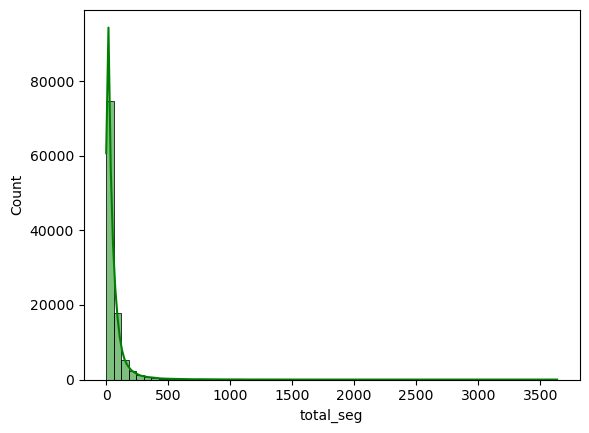

In [8]:
sns.histplot(df_web_test_dif_time['total_seg'], kde=True, bins=60, color="green")
plt.show()

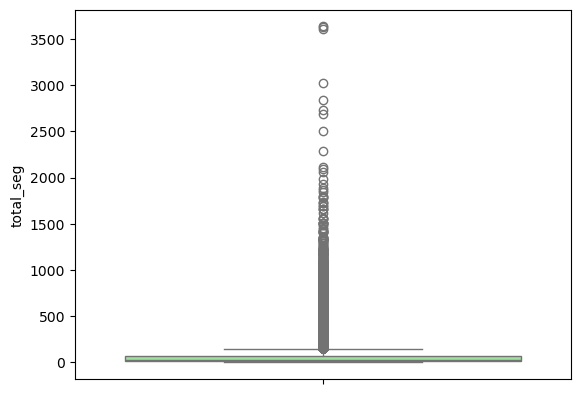

In [10]:
sns.boxplot(df_web_test_dif_time['total_seg'], color="lightgreen")
plt.show()

0.14.2


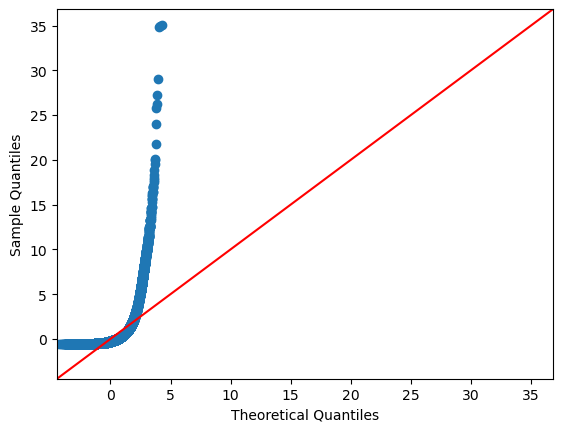

In [11]:
from scipy import stats
import statsmodels.api as sm

print(sm.__version__)
sm.qqplot(df_web_test_dif_time['total_seg'].values, fit=True, line='45')
plt.show()

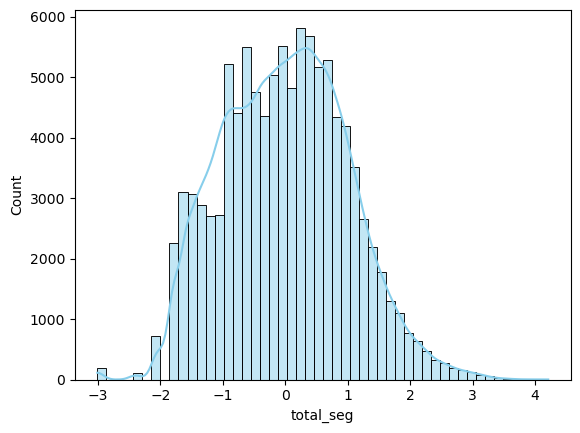

In [12]:
log_transformed_total_seg = np.log1p(df_web_test_dif_time['total_seg'])
standardized_log_total_seg = (log_transformed_total_seg - log_transformed_total_seg.mean()) / log_transformed_total_seg.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg, kde=True, bins=50, color="skyblue")
plt.show()

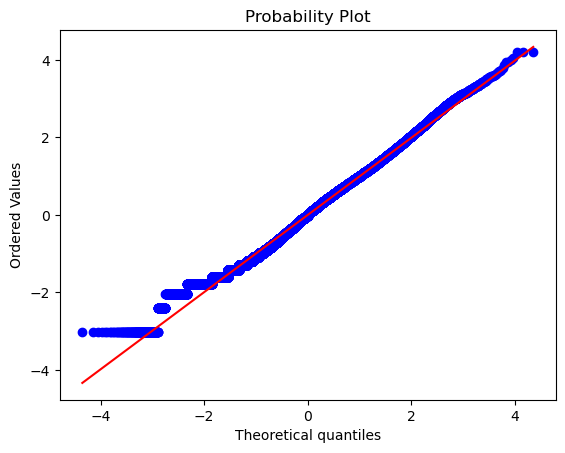

In [13]:
stats.probplot(standardized_log_total_seg, plot=plt);
plt.show()

In [15]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.03857426606038361, 3.046046005161079e-134)

In [17]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [18]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 103496.
  res = hypotest_fun_out(*samples, **kwds)


(0.9932966825048786, 4.4320674168668556e-51)

**Analysis**: As there is lot of outliners which we considers clients who did not not close the session and remain the PC open, we are going to use the median instead of mean. 
The total process, as median, it takes 152 minutes, being the first step the faster one with 10 seconds and the longest is number 2 with 66 seconds.

## **Time between steps -Control** ##

In [213]:
#Filter what we want: control condition 1, steps forward 0-1;1-2;2-3;3-4. keep_control=YES
condition_control=df_web_control["control"]==1
df_web_control_dif_time=df_web_control[condition_control]
condition_step=(df_web_control_dif_time["step_jump"]=="0-1") | (df_web_control_dif_time["step_jump"]=="1-2") | (df_web_control_dif_time["step_jump"]=="2-3") | (df_web_control_dif_time["step_jump"]=="3-4")
df_web_control_dif_time=df_web_control_dif_time[condition_step]
condition_keep=df_web_control_dif_time["keep_contol"]=="YES"
df_web_control_dif_time=df_web_control_dif_time[condition_keep]
df_web_control_dif_time
df_web_control_dif_time

In [23]:
df_web_control_dif_time["total_seg"].describe()

count    84700.000000
mean        64.977296
std        100.011137
min          0.000000
25%         13.000000
50%         35.000000
75%         76.000000
max       2308.000000
Name: total_seg, dtype: float64

In [25]:
time_stat=df_web_control_dif_time.groupby("step_jump")["total_seg"].agg(["count","median","std"])
time_stat

,count,median,std
step_jump,,,
0-1,25771,17.0,78.261446
1-2,22338,18.0,53.653352
2-3,21297,66.0,84.942387
3-4,15294,75.0,154.085849


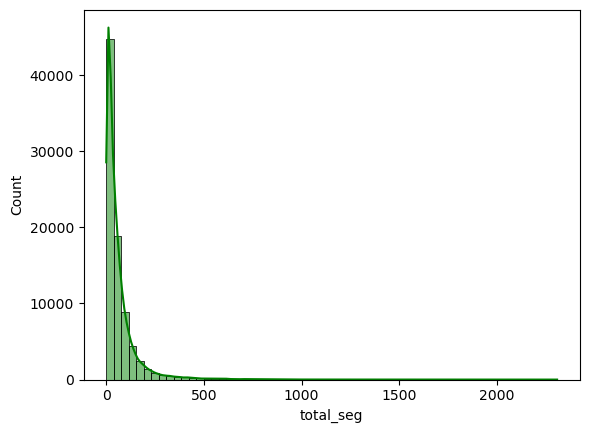

In [26]:
sns.histplot(df_web_control_dif_time['total_seg'], kde=True, bins=60, color="green")
plt.show()

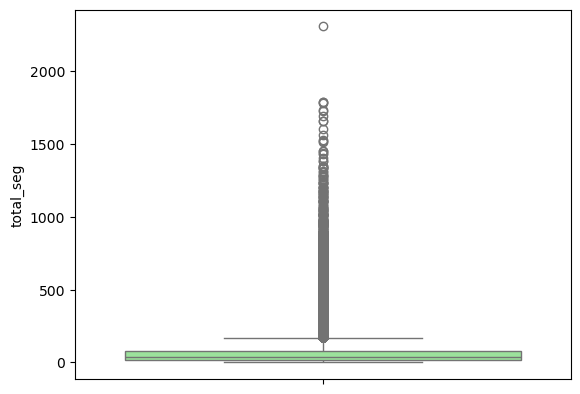

In [27]:
sns.boxplot(df_web_control_dif_time['total_seg'], color="lightgreen")
plt.show()

0.14.2


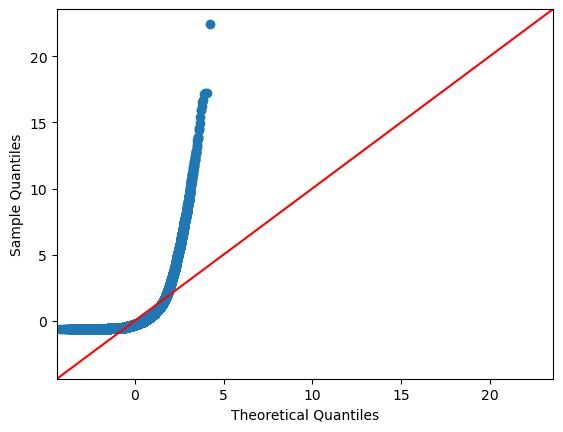

In [28]:
from scipy import stats
import statsmodels.api as sm

print(sm.__version__)
sm.qqplot(df_web_control_dif_time['total_seg'].values, fit=True, line='45')
plt.show()

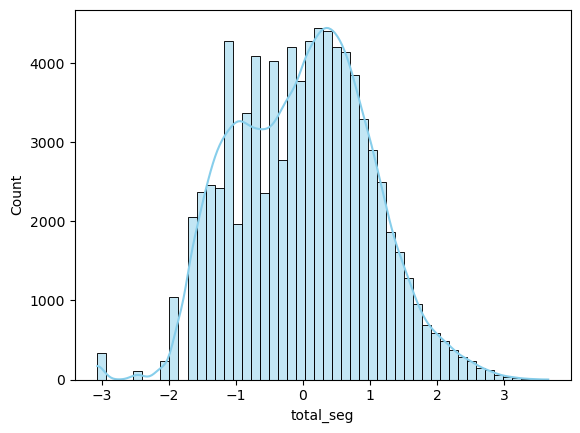

In [30]:
log_transformed_total_seg_ct = np.log1p(df_web_control_dif_time['total_seg'])
standardized_log_total_seg_ct = (log_transformed_total_seg_ct - log_transformed_total_seg_ct.mean()) / log_transformed_total_seg_ct.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_ct, kde=True, bins=50, color="skyblue")
plt.show()

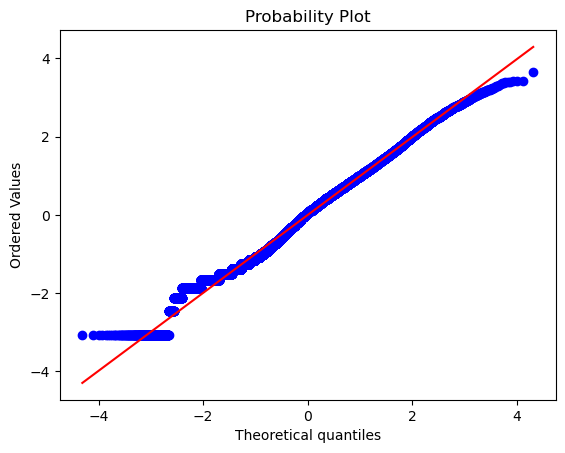

In [34]:
stats.probplot(standardized_log_total_seg_ct, plot=plt);
plt.show()

In [38]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_ct, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.04394279721306146, 1.4696845724122463e-142)

In [39]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [40]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_ct)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 84700.
  res = hypotest_fun_out(*samples, **kwds)


(0.992989818689813, 4.2442978851950945e-49)

## **Calculate time between setp**

## Step 0-1

In [51]:
#Test group:
condition_control=df_web_test["control"]==1
df_web_test_dif_time01=df_web_test[condition_control]
condition_step=(df_web_test_dif_time01["step_jump"]=="0-1") 
df_web_test_dif_time01=df_web_test_dif_time01[condition_step]
condition_keep=df_web_test_dif_time01["keep_contol"]=="YES"
df_web_test_dif_time01=df_web_test_dif_time01[condition_keep]
df_web_test_dif_time01

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
2,137142,240561,7338123,612065484_94198474375,100019538_17884295066_43909,1,2017-04-09 16:21:12,Test,2017-04-09,1900-01-01 16:21:12,16,0-1,1.0,00:00:16,0,0,16,16,YES
8,137136,240555,7338123,612065484_94198474375,100019538_17884295066_43909,1,2017-04-09 16:22:04,Test,2017-04-09,1900-01-01 16:22:04,16,0-1,1.0,00:00:05,0,0,5,5,YES
13,140908,352680,2478628,754122351_18568832435,100022086_87870757897_149620,1,2017-05-23 20:44:23,Test,2017-05-23,1900-01-01 20:44:23,20,0-1,1.0,00:00:22,0,0,22,22,YES
18,31952,56226,8631696,429350107_31978453627,100173292_91322748906_143563,1,2017-04-25 10:29:06,Test,2017-04-25,1900-01-01 10:29:06,10,0-1,1.0,00:00:11,0,0,11,11,YES
23,9756,17111,9341024,750259984_64435904859,100217156_67053490690_383412,1,2017-04-12 11:51:48,Test,2017-04-12,1900-01-01 11:51:48,11,0-1,1.0,00:00:36,0,0,36,36,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177820,21344,37385,1498554,694433688_36658101552,999960019_60838685252_926860,1,2017-04-19 19:22:40,Test,2017-04-19,1900-01-01 19:22:40,19,0-1,1.0,00:00:09,0,0,9,9,YES
177825,4937,8582,2979920,830229399_73416253406,999971096_28827267783_236076,1,2017-04-13 10:32:07,Test,2017-04-13,1900-01-01 10:32:07,10,0-1,1.0,00:00:18,0,0,18,18,YES
177831,120943,213017,4449968,842902495_57580498240,999976049_95772503197_182554,1,2017-04-04 12:52:26,Test,2017-04-04,1900-01-01 12:52:26,12,0-1,1.0,00:02:16,0,2,16,136,YES
177837,46511,81693,829911,648229874_89449279372,999984454_18731538378_781808,1,2017-03-29 11:18:51,Test,2017-03-29,1900-01-01 11:18:51,11,0-1,1.0,00:00:18,0,0,18,18,YES


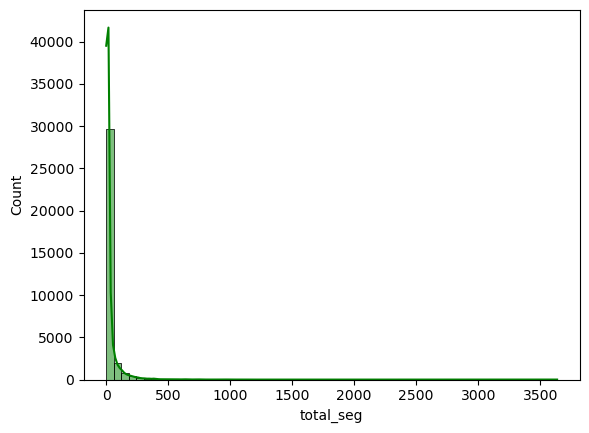

In [52]:
sns.histplot(df_web_test_dif_time01['total_seg'], kde=True, bins=60, color="green")
plt.show()

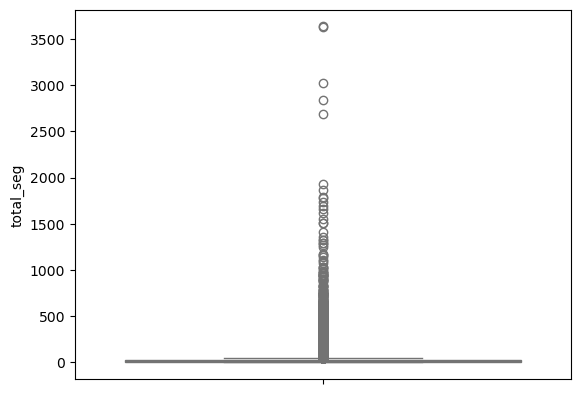

In [54]:
sns.boxplot(df_web_test_dif_time01['total_seg'], color="lightgreen")
plt.show()

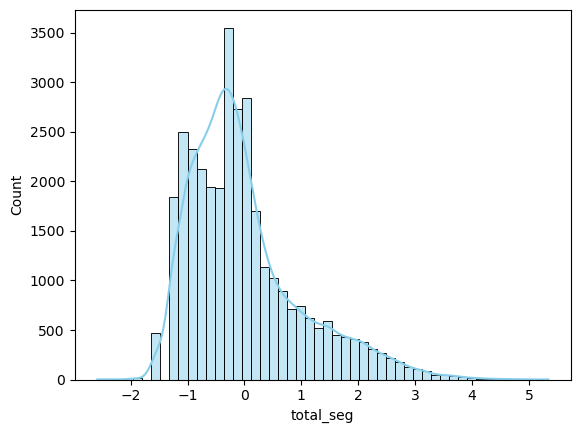

In [55]:
log_transformed_total_seg_ct01 = np.log1p(df_web_test_dif_time01['total_seg'])
standardized_log_total_seg_ct01 = (log_transformed_total_seg_ct01 - log_transformed_total_seg_ct01.mean()) / log_transformed_total_seg_ct01.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_ct01, kde=True, bins=50, color="skyblue")
plt.show()

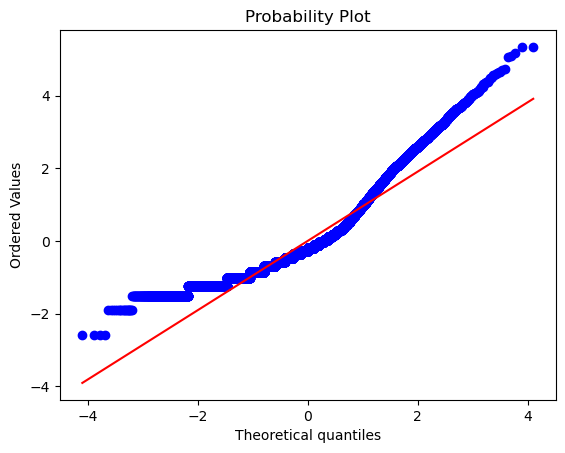

In [56]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_ct01, plot=plt);
plt.show()

In [57]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_ct01, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.13016356070778723, 0.0)

In [58]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [60]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_ct01)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33372.
  res = hypotest_fun_out(*samples, **kwds)


(0.9097015515841343, 1.497022456366267e-85)

In [62]:
#Control group:
condition_control=df_web_control["control"]==1
df_web_control_dif_time01=df_web_control[condition_control]
condition_step=(df_web_control_dif_time01["step_jump"]=="0-1") 
df_web_control_dif_time01=df_web_control_dif_time01[condition_step]
condition_keep=df_web_control_dif_time01["keep_contol"]=="YES"
df_web_control_dif_time01=df_web_control_dif_time01[condition_keep]
df_web_control_dif_time01

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
2,11362,27511,5623007,700426174_33289797318,100037962_47432393712_705583,1,2017-04-14 16:43:55,Control,2017-04-14,1900-01-01 16:43:55,16,0-1,1.0,00:00:39,0,0,39,39,YES
5,649,1612,4823947,611052344_43146965242,100057941_88477660212_944512,1,2017-04-09 11:30:40,Control,2017-04-09,1900-01-01 11:30:40,11,0-1,1.0,00:00:30,0,0,30,30,YES
12,100341,242548,3479519,194422203_56127484794,10006594_66157970412_679648,1,2017-04-13 11:50:28,Control,2017-04-13,1900-01-01 11:50:28,11,0-1,1.0,00:00:10,0,0,10,10,YES
20,138391,601842,5477656,164180384_39691984082,10007589_47780784567_391490,1,2017-05-18 07:54:19,Control,2017-05-18,1900-01-01 07:54:19,7,0-1,1.0,00:02:47,0,2,47,167,YES
25,105343,368644,8306812,987870350_90903222476,100096068_8301717872_987164,1,2017-05-22 18:15:14,Control,2017-05-22,1900-01-01 18:15:14,18,0-1,1.0,00:00:13,0,0,13,13,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143436,22540,54307,4530744,972288208_26214030705,999720028_44146654962_446209,1,2017-04-25 20:36:55,Control,2017-04-25,1900-01-01 20:36:55,20,0-1,1.0,00:00:18,0,0,18,18,YES
143441,58188,139810,7462323,847563410_72648439715,999859408_41720215615_938916,1,2017-04-05 13:35:46,Control,2017-04-05,1900-01-01 13:35:46,13,0-1,1.0,00:00:09,0,0,9,9,YES
143446,60097,144166,7031731,675674236_56499394876,999890184_77121766521_746360,1,2017-04-19 11:19:14,Control,2017-04-19,1900-01-01 11:19:14,11,0-1,1.0,00:02:05,0,2,5,125,YES
143454,94801,228567,8035493,219846414_94112504392,999936732_27995195904_324897,1,2017-04-13 05:44:03,Control,2017-04-13,1900-01-01 05:44:03,5,0-1,1.0,00:01:04,0,1,4,64,YES


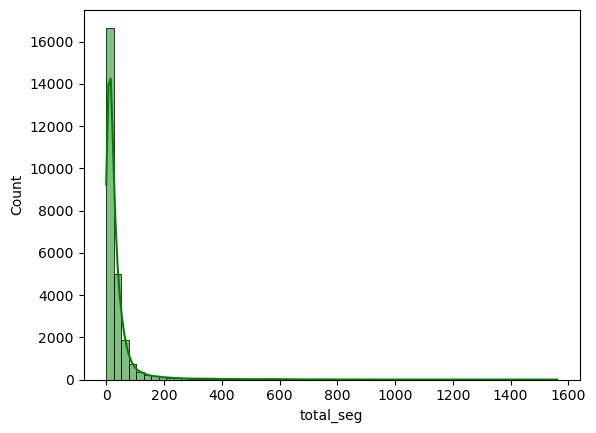

In [63]:
sns.histplot(df_web_control_dif_time01['total_seg'], kde=True, bins=60, color="green")
plt.show()

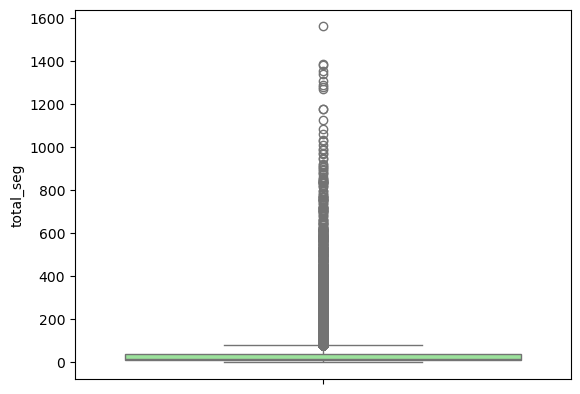

In [64]:
sns.boxplot(df_web_control_dif_time01['total_seg'], color="lightgreen")
plt.show()

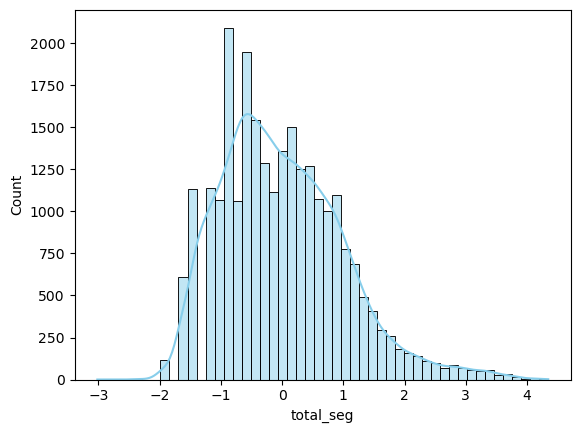

In [65]:
log_transformed_total_seg_cc01 = np.log1p(df_web_control_dif_time01['total_seg'])
standardized_log_total_seg_cc01 = (log_transformed_total_seg_cc01 - log_transformed_total_seg_cc01.mean()) / log_transformed_total_seg_cc01.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_cc01, kde=True, bins=50, color="skyblue")
plt.show()

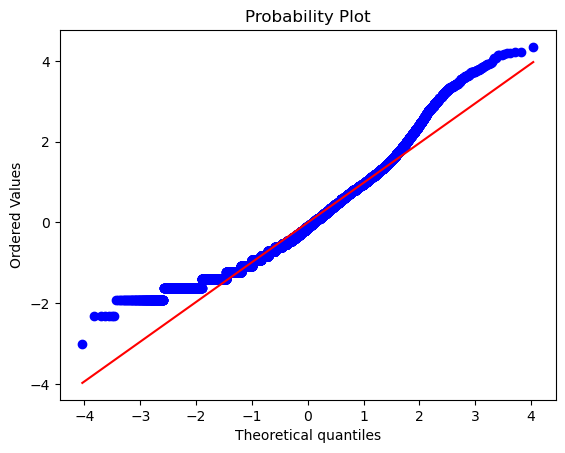

In [67]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_cc01, plot=plt);
plt.show()

In [68]:
# Conducting the Kolmogorov-Smirnov control on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_cc01, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.06283234393582088, 6.829857341946312e-89)

In [71]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [74]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_cc01)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 25771.
  res = hypotest_fun_out(*samples, **kwds)


(0.9666642004884222, 4.1291277019784125e-59)

## Step 1-2

In [77]:
#Test group:
condition_control=df_web_test["control"]==1
df_web_test_dif_time12=df_web_test[condition_control]
condition_step=(df_web_test_dif_time12["step_jump"]=="1-2") 
df_web_test_dif_time12=df_web_test_dif_time12[condition_step]
condition_keep=df_web_test_dif_time12["keep_contol"]=="YES"
df_web_test_dif_time12=df_web_test_dif_time12[condition_keep]
df_web_test_dif_time12

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
3,137141,240560,7338123,612065484_94198474375,100019538_17884295066_43909,2,2017-04-09 16:21:21,Test,2017-04-09,1900-01-01 16:21:21,16,1-2,1.0,00:00:09,0,0,9,9,YES
9,137135,240554,7338123,612065484_94198474375,100019538_17884295066_43909,2,2017-04-09 16:22:08,Test,2017-04-09,1900-01-01 16:22:08,16,1-2,1.0,00:00:04,0,0,4,4,YES
14,140907,352679,2478628,754122351_18568832435,100022086_87870757897_149620,2,2017-05-23 20:45:08,Test,2017-05-23,1900-01-01 20:45:08,20,1-2,1.0,00:00:45,0,0,45,45,YES
19,31951,56225,8631696,429350107_31978453627,100173292_91322748906_143563,2,2017-04-25 10:29:14,Test,2017-04-25,1900-01-01 10:29:14,10,1-2,1.0,00:00:08,0,0,8,8,YES
25,9754,17109,9341024,750259984_64435904859,100217156_67053490690_383412,2,2017-04-12 11:57:21,Test,2017-04-12,1900-01-01 11:57:21,11,1-2,1.0,00:02:33,0,2,33,153,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177821,21343,37384,1498554,694433688_36658101552,999960019_60838685252_926860,2,2017-04-19 19:23:07,Test,2017-04-19,1900-01-01 19:23:07,19,1-2,1.0,00:00:27,0,0,27,27,YES
177827,4935,8580,2979920,830229399_73416253406,999971096_28827267783_236076,2,2017-04-13 10:32:53,Test,2017-04-13,1900-01-01 10:32:53,10,1-2,1.0,00:00:09,0,0,9,9,YES
177832,120942,213016,4449968,842902495_57580498240,999976049_95772503197_182554,2,2017-04-04 12:53:01,Test,2017-04-04,1900-01-01 12:53:01,12,1-2,1.0,00:00:35,0,0,35,35,YES
177838,46510,81692,829911,648229874_89449279372,999984454_18731538378_781808,2,2017-03-29 11:19:32,Test,2017-03-29,1900-01-01 11:19:32,11,1-2,1.0,00:00:41,0,0,41,41,YES


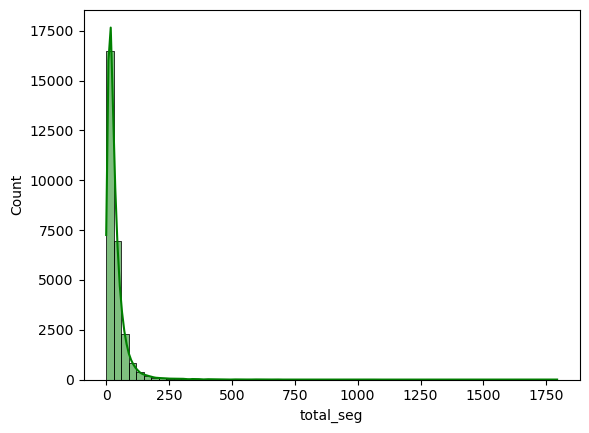

In [79]:
sns.histplot(df_web_test_dif_time12['total_seg'], kde=True, bins=60, color="green")
plt.show()

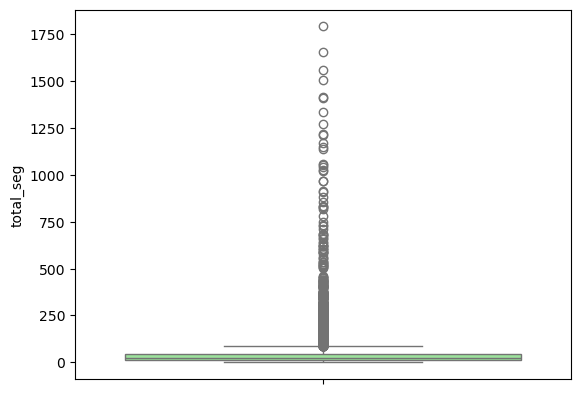

In [81]:
sns.boxplot(df_web_test_dif_time12['total_seg'], color="lightgreen")
plt.show()

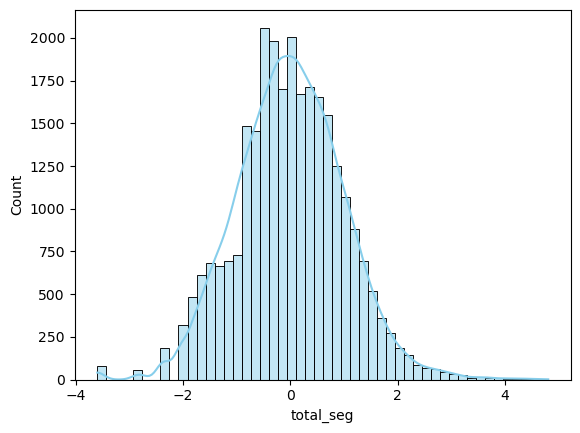

In [82]:
log_transformed_total_seg_ct12 = np.log1p(df_web_test_dif_time12['total_seg'])
standardized_log_total_seg_ct12 = (log_transformed_total_seg_ct12 - log_transformed_total_seg_ct12.mean()) / log_transformed_total_seg_ct12.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_ct12, kde=True, bins=50, color="skyblue")
plt.show()

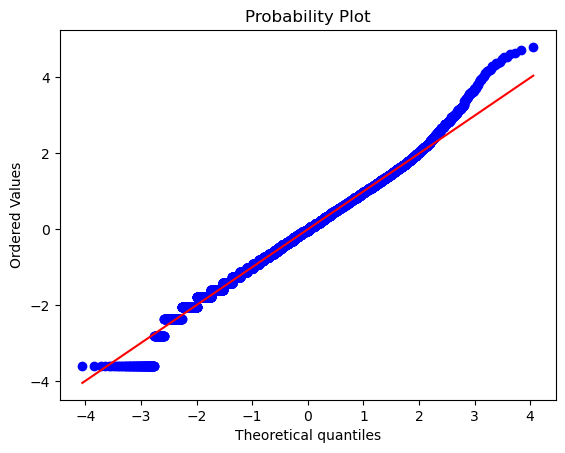

In [84]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_ct12, plot=plt);
plt.show()

In [85]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_ct12, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.018438170136037657, 1.459854629251361e-08)

In [86]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [87]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_ct12)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 27535.
  res = hypotest_fun_out(*samples, **kwds)


(0.9953251493498102, 3.281721048138905e-28)

In [89]:
#Control group:
condition_control=df_web_control["control"]==1
df_web_control_dif_time12=df_web_control[condition_control]
condition_step=(df_web_control_dif_time12["step_jump"]=="1-2") 
df_web_control_dif_time12=df_web_control_dif_time12[condition_step]
condition_keep=df_web_control_dif_time12["keep_contol"]=="YES"
df_web_control_dif_time12=df_web_control_dif_time12[condition_keep]
df_web_control_dif_time12

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
6,648,1611,4823947,611052344_43146965242,100057941_88477660212_944512,2,2017-04-09 11:31:50,Control,2017-04-09,1900-01-01 11:31:50,11,1-2,1.0,00:01:10,0,1,10,70,YES
9,645,1608,4823947,611052344_43146965242,100057941_88477660212_944512,2,2017-04-09 11:33:58,Control,2017-04-09,1900-01-01 11:33:58,11,1-2,1.0,00:00:37,0,0,37,37,YES
13,100340,242547,3479519,194422203_56127484794,10006594_66157970412_679648,2,2017-04-13 11:50:38,Control,2017-04-13,1900-01-01 11:50:38,11,1-2,1.0,00:00:10,0,0,10,10,YES
21,138390,601841,5477656,164180384_39691984082,10007589_47780784567_391490,2,2017-05-18 07:55:05,Control,2017-05-18,1900-01-01 07:55:05,7,1-2,1.0,00:00:46,0,0,46,46,YES
37,61765,148173,984526,101850349_35918274798,100254180_47139859079_984581,2,2017-04-05 21:43:46,Control,2017-04-05,1900-01-01 21:43:46,21,1-2,1.0,00:00:52,0,0,52,52,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143422,2375,5904,3669611,144601451_79937116356,999528902_49133507319_516085,2,2017-03-29 18:00:56,Control,2017-03-29,1900-01-01 18:00:56,18,1-2,1.0,00:00:32,0,0,32,32,YES
143434,7722,18913,1651429,526566157_18170629587,999707810_18368223868_308626,2,2017-04-21 21:17:55,Control,2017-04-21,1900-01-01 21:17:55,21,1-2,1.0,00:01:10,0,1,10,70,YES
143442,58187,139809,7462323,847563410_72648439715,999859408_41720215615_938916,2,2017-04-05 13:36:27,Control,2017-04-05,1900-01-01 13:36:27,13,1-2,1.0,00:00:41,0,0,41,41,YES
143447,60096,144165,7031731,675674236_56499394876,999890184_77121766521_746360,2,2017-04-19 11:19:27,Control,2017-04-19,1900-01-01 11:19:27,11,1-2,1.0,00:00:13,0,0,13,13,YES


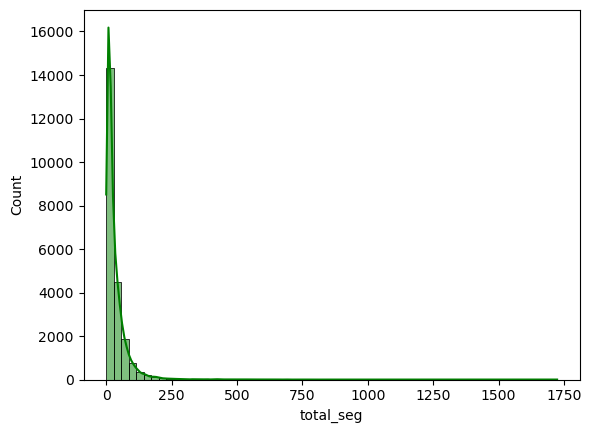

In [90]:
sns.histplot(df_web_control_dif_time12['total_seg'], kde=True, bins=60, color="green")
plt.show()

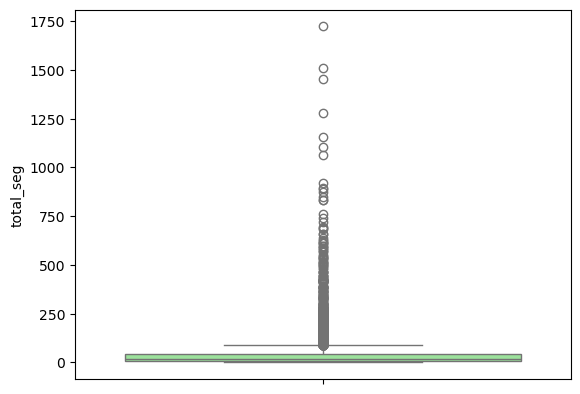

In [93]:
sns.boxplot(df_web_control_dif_time12['total_seg'], color="lightgreen")
plt.show()

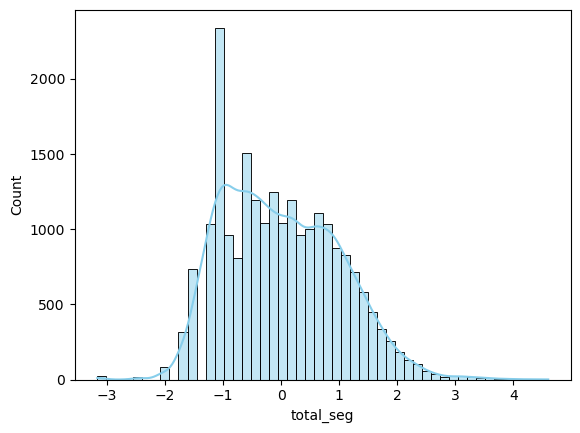

In [94]:
log_transformed_total_seg_cc12 = np.log1p(df_web_control_dif_time12['total_seg'])
standardized_log_total_seg_cc12 = (log_transformed_total_seg_cc12 - log_transformed_total_seg_cc12.mean()) / log_transformed_total_seg_cc12.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_cc12, kde=True, bins=50, color="skyblue")
plt.show()

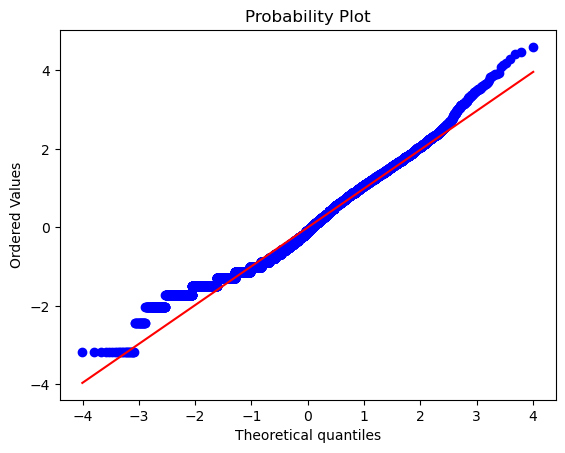

In [96]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_cc12, plot=plt);
plt.show()

In [97]:
# Conducting the Kolmogorov-Smirnov control on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_cc12, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.06875548866525488, 2.907008601959398e-92)

In [99]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [100]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_cc12)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 22338.
  res = hypotest_fun_out(*samples, **kwds)


(0.9799312446812238, 2.015058750598515e-47)

## Step 2-3

In [106]:
#Test group:
condition_control=df_web_test["control"]==1
df_web_test_dif_time23=df_web_test[condition_control]
condition_step=(df_web_test_dif_time23["step_jump"]=="2-3") 
df_web_test_dif_time23=df_web_test_dif_time23[condition_step]
condition_keep=df_web_test_dif_time23["keep_contol"]=="YES"
df_web_test_dif_time23=df_web_test_dif_time23[condition_keep]
df_web_test_dif_time23

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
10,137134,240553,7338123,612065484_94198474375,100019538_17884295066_43909,3,2017-04-09 16:24:01,Test,2017-04-09,1900-01-01 16:24:01,16,2-3,1.0,00:01:53,0,1,53,113,YES
15,140906,352678,2478628,754122351_18568832435,100022086_87870757897_149620,3,2017-05-23 20:46:01,Test,2017-05-23,1900-01-01 20:46:01,20,2-3,1.0,00:00:53,0,0,53,53,YES
20,31950,56224,8631696,429350107_31978453627,100173292_91322748906_143563,3,2017-04-25 10:30:02,Test,2017-04-25,1900-01-01 10:30:02,10,2-3,1.0,00:00:48,0,0,48,48,YES
26,9753,17108,9341024,750259984_64435904859,100217156_67053490690_383412,3,2017-04-12 11:57:59,Test,2017-04-12,1900-01-01 11:57:59,11,2-3,1.0,00:00:38,0,0,38,38,YES
29,9750,17105,9341024,750259984_64435904859,100217156_67053490690_383412,3,2017-04-12 12:05:37,Test,2017-04-12,1900-01-01 12:05:37,12,2-3,1.0,00:01:39,0,1,39,99,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177808,104395,184118,9498187,599653496_46358190244,999954858_74676709104_879685,3,2017-04-05 11:14:29,Test,2017-04-05,1900-01-01 11:14:29,11,2-3,1.0,00:00:34,0,0,34,34,YES
177814,42253,74398,8971313,520929316_99288864740,999958344_67534252886_39917,3,2017-04-15 00:35:12,Test,2017-04-15,1900-01-01 00:35:12,0,2-3,1.0,00:00:26,0,0,26,26,YES
177828,4934,8579,2979920,830229399_73416253406,999971096_28827267783_236076,3,2017-04-13 10:33:40,Test,2017-04-13,1900-01-01 10:33:40,10,2-3,1.0,00:00:47,0,0,47,47,YES
177833,120941,213015,4449968,842902495_57580498240,999976049_95772503197_182554,3,2017-04-04 12:54:54,Test,2017-04-04,1900-01-01 12:54:54,12,2-3,1.0,00:01:53,0,1,53,113,YES


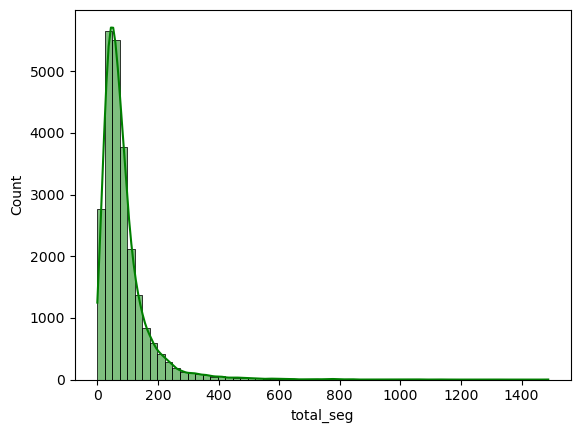

In [108]:
sns.histplot(df_web_test_dif_time23['total_seg'], kde=True, bins=60, color="green")
plt.show()

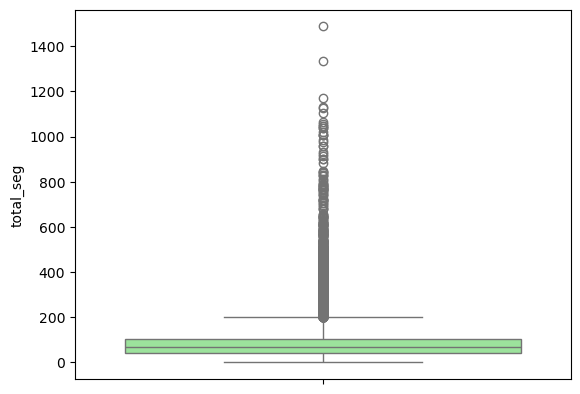

In [109]:
sns.boxplot(df_web_test_dif_time23['total_seg'], color="lightgreen")
plt.show()

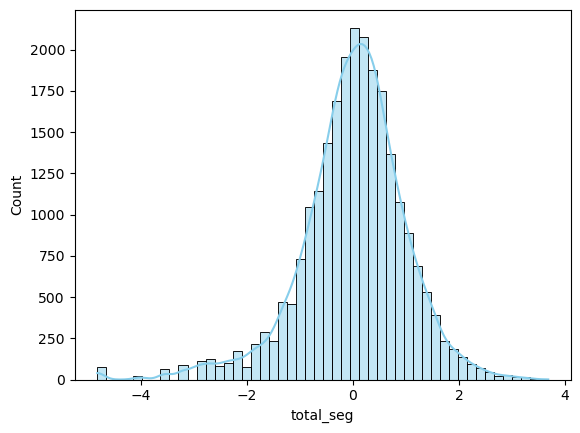

In [110]:
log_transformed_total_seg_ct23 = np.log1p(df_web_test_dif_time23['total_seg'])
standardized_log_total_seg_ct23 = (log_transformed_total_seg_ct23 - log_transformed_total_seg_ct23.mean()) / log_transformed_total_seg_ct23.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_ct23, kde=True, bins=50, color="skyblue")
plt.show()

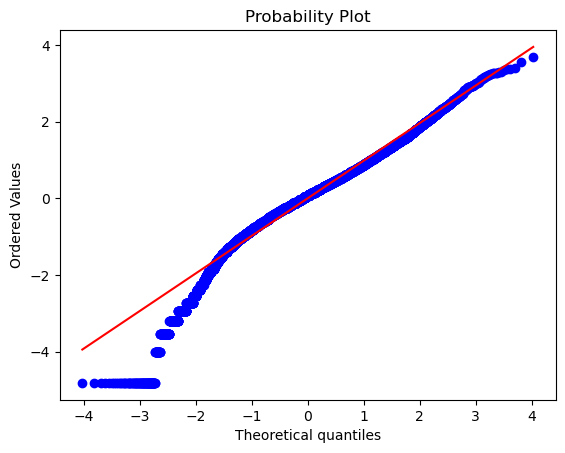

In [115]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_ct23, plot=plt);
plt.show()

In [116]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_ct23, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.06390498041087034, 1.992780454900899e-86)

In [119]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [120]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_ct23)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24218.
  res = hypotest_fun_out(*samples, **kwds)


(0.9623213206813471, 2.341843730815048e-60)

In [123]:
#Control group:
condition_control=df_web_control["control"]==1
df_web_control_dif_time23=df_web_control[condition_control]
condition_step=(df_web_control_dif_time23["step_jump"]=="2-3") 
df_web_control_dif_time23=df_web_control_dif_time23[condition_step]
condition_keep=df_web_control_dif_time23["keep_contol"]=="YES"
df_web_control_dif_time23=df_web_control_dif_time23[condition_keep]
df_web_control_dif_time23

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
7,647,1610,4823947,611052344_43146965242,100057941_88477660212_944512,3,2017-04-09 11:32:54,Control,2017-04-09,1900-01-01 11:32:54,11,2-3,1.0,00:01:04,0,1,4,64,YES
10,644,1607,4823947,611052344_43146965242,100057941_88477660212_944512,3,2017-04-09 11:34:24,Control,2017-04-09,1900-01-01 11:34:24,11,2-3,1.0,00:00:26,0,0,26,26,YES
14,100339,242546,3479519,194422203_56127484794,10006594_66157970412_679648,3,2017-04-13 11:52:02,Control,2017-04-13,1900-01-01 11:52:02,11,2-3,1.0,00:01:24,0,1,24,84,YES
22,138389,601840,5477656,164180384_39691984082,10007589_47780784567_391490,3,2017-05-18 07:58:06,Control,2017-05-18,1900-01-01 07:58:06,7,2-3,1.0,00:03:01,0,3,1,181,YES
38,61764,148172,984526,101850349_35918274798,100254180_47139859079_984581,3,2017-04-05 21:44:43,Control,2017-04-05,1900-01-01 21:44:43,21,2-3,1.0,00:00:57,0,0,57,57,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143416,40400,97025,6232942,562280795_53736087761,999528108_94761236019_731649,3,2017-04-17 10:04:21,Control,2017-04-17,1900-01-01 10:04:21,10,2-3,1.0,00:00:27,0,0,27,27,YES
143418,40398,97023,6232942,562280795_53736087761,999528108_94761236019_731649,3,2017-04-17 10:04:33,Control,2017-04-17,1900-01-01 10:04:33,10,2-3,1.0,00:00:06,0,0,6,6,YES
143423,2374,5903,3669611,144601451_79937116356,999528902_49133507319_516085,3,2017-03-29 18:02:33,Control,2017-03-29,1900-01-01 18:02:33,18,2-3,1.0,00:01:37,0,1,37,97,YES
143443,58186,139808,7462323,847563410_72648439715,999859408_41720215615_938916,3,2017-04-05 13:38:27,Control,2017-04-05,1900-01-01 13:38:27,13,2-3,1.0,00:02:00,0,2,0,120,YES


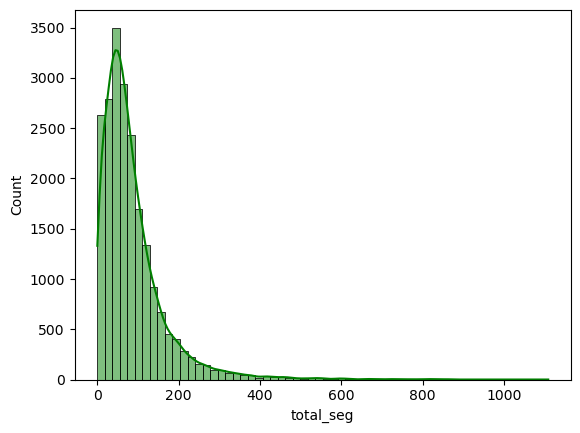

In [126]:
sns.histplot(df_web_control_dif_time23['total_seg'], kde=True, bins=60, color="green")
plt.show()

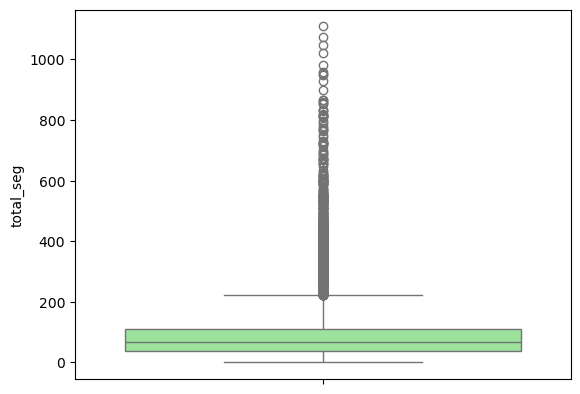

In [128]:
sns.boxplot(df_web_control_dif_time23['total_seg'], color="lightgreen")
plt.show()

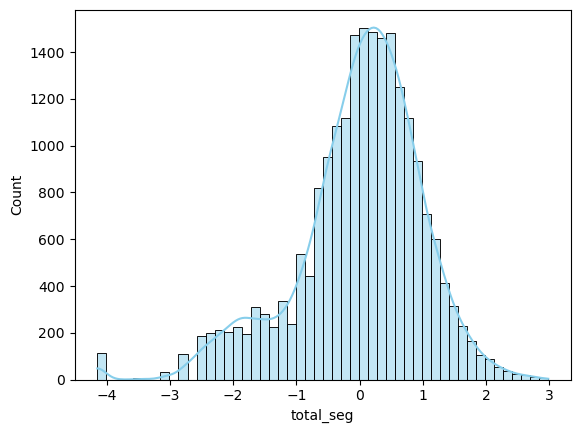

In [131]:
log_transformed_total_seg_cc23 = np.log1p(df_web_control_dif_time23['total_seg'])
standardized_log_total_seg_cc23 = (log_transformed_total_seg_cc23 - log_transformed_total_seg_cc23.mean()) / log_transformed_total_seg_cc23.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_cc23, kde=True, bins=50, color="skyblue")
plt.show()

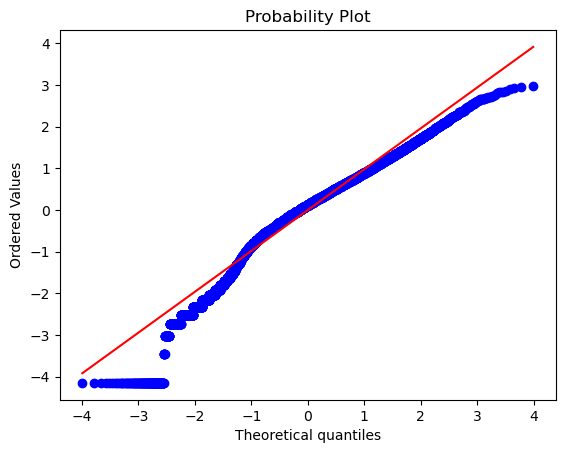

In [132]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_cc23, plot=plt);
plt.show()

In [133]:
# Conducting the Kolmogorov-Smirnov control on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_cc23, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.07663859042750154, 3.0773292192555083e-109)

In [135]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [137]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_cc23)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21297.
  res = hypotest_fun_out(*samples, **kwds)


(0.9612256108330831, 1.4609756404160873e-58)

## Step 3-4


In [147]:
#Test group:
condition_control=df_web_test["control"]==1
df_web_test_dif_time34=df_web_test[condition_control]
condition_step=(df_web_test_dif_time34["step_jump"]=="3-4") 
df_web_test_dif_time34=df_web_test_dif_time34[condition_step]
condition_keep=df_web_test_dif_time34["keep_contol"]=="YES"
df_web_test_dif_time34=df_web_test_dif_time34[condition_keep]
df_web_test_dif_time34

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
11,137133,240552,7338123,612065484_94198474375,100019538_17884295066_43909,4,2017-04-09 16:24:58,Test,2017-04-09,1900-01-01 16:24:58,16,3-4,1.0,00:00:57,0,0,57,57,YES
16,140905,352677,2478628,754122351_18568832435,100022086_87870757897_149620,4,2017-05-23 20:47:01,Test,2017-05-23,1900-01-01 20:47:01,20,3-4,1.0,00:01:00,0,1,0,60,YES
21,31949,56223,8631696,429350107_31978453627,100173292_91322748906_143563,4,2017-04-25 10:30:30,Test,2017-04-25,1900-01-01 10:30:30,10,3-4,1.0,00:00:28,0,0,28,28,YES
30,9749,17104,9341024,750259984_64435904859,100217156_67053490690_383412,4,2017-04-12 12:08:09,Test,2017-04-12,1900-01-01 12:08:09,12,3-4,1.0,00:02:32,0,2,32,152,YES
48,123456,217234,1562128,297078435_42288608841,100258507_71262593004_214494,4,2017-03-29 12:48:24,Test,2017-03-29,1900-01-01 12:48:24,12,3-4,1.0,00:00:43,0,0,43,43,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177809,104394,184117,9498187,599653496_46358190244,999954858_74676709104_879685,4,2017-04-05 11:14:59,Test,2017-04-05,1900-01-01 11:14:59,11,3-4,1.0,00:00:30,0,0,30,30,YES
177815,42252,74397,8971313,520929316_99288864740,999958344_67534252886_39917,4,2017-04-15 00:35:54,Test,2017-04-15,1900-01-01 00:35:54,0,3-4,1.0,00:00:42,0,0,42,42,YES
177829,4933,8578,2979920,830229399_73416253406,999971096_28827267783_236076,4,2017-04-13 10:34:08,Test,2017-04-13,1900-01-01 10:34:08,10,3-4,1.0,00:00:28,0,0,28,28,YES
177835,120939,213013,4449968,842902495_57580498240,999976049_95772503197_182554,4,2017-04-04 13:02:18,Test,2017-04-04,1900-01-01 13:02:18,13,3-4,1.0,00:02:43,0,2,43,163,YES


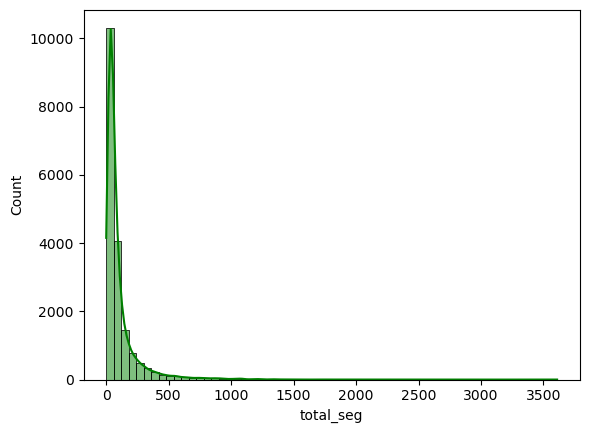

In [148]:
sns.histplot(df_web_test_dif_time34['total_seg'], kde=True, bins=60, color="green")
plt.show()

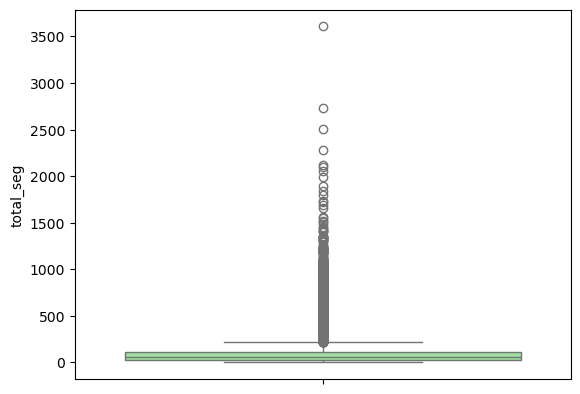

In [150]:
sns.boxplot(df_web_test_dif_time34['total_seg'], color="lightgreen")
plt.show()

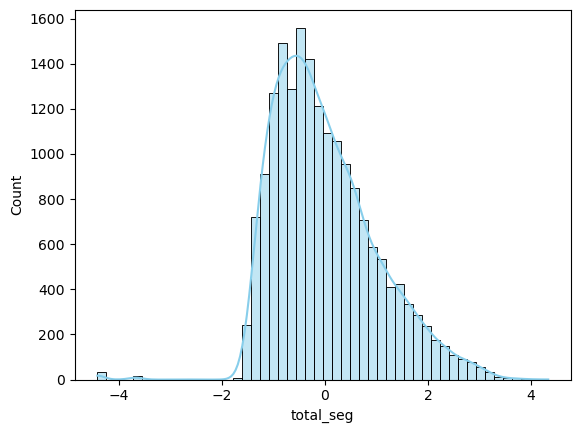

In [151]:
log_transformed_total_seg_ct34 = np.log1p(df_web_test_dif_time34['total_seg'])
standardized_log_total_seg_ct34 = (log_transformed_total_seg_ct34 - log_transformed_total_seg_ct34.mean()) / log_transformed_total_seg_ct34.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_ct34, kde=True, bins=50, color="skyblue")
plt.show()

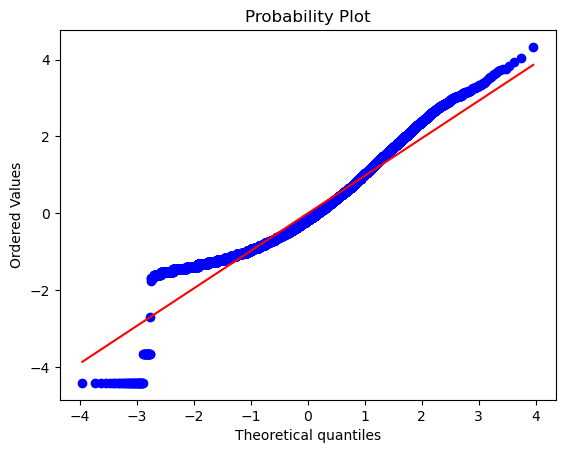

In [153]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_ct34, plot=plt);
plt.show()

In [154]:
# Conducting the Kolmogorov-Smirnov test on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_ct34, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.07424478876984641, 1.6358696064404565e-88)

In [155]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [157]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_ct34)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18371.
  res = hypotest_fun_out(*samples, **kwds)


(0.9523040887808046, 8.193573296946918e-60)

In [163]:
#Control group:
condition_control=df_web_control["control"]==1
df_web_control_dif_time34=df_web_control[condition_control]
condition_step=(df_web_control_dif_time34["step_jump"]=="3-4") 
df_web_control_dif_time34=df_web_control_dif_time34[condition_step]
condition_keep=df_web_control_dif_time34["keep_contol"]=="YES"
df_web_control_dif_time34=df_web_control_dif_time34[condition_keep]
df_web_control_dif_time34

,Unnamed: 0.1,Unnamed: 0,client_id,visitor_id,visit_id,process_step,date_time,Variation,date,time,hour,step_jump,control,dif_time,dif_hour,dif_min,dif_seg,total_seg,keep_contol
17,100336,242543,3479519,194422203_56127484794,10006594_66157970412_679648,4,2017-04-13 11:56:12,Control,2017-04-13,1900-01-01 11:56:12,11,3-4,1.0,00:00:00,0,0,0,0,YES
23,138388,601839,5477656,164180384_39691984082,10007589_47780784567_391490,4,2017-05-18 08:03:33,Control,2017-05-18,1900-01-01 08:03:33,8,3-4,1.0,00:05:27,0,5,27,327,YES
39,61763,148171,984526,101850349_35918274798,100254180_47139859079_984581,4,2017-04-05 21:47:43,Control,2017-04-05,1900-01-01 21:47:43,21,3-4,1.0,00:03:00,0,3,0,180,YES
44,88838,213940,7224020,749093873_67448715439,100309269_21684743336_936307,4,2017-04-16 06:23:54,Control,2017-04-16,1900-01-01 06:23:54,6,3-4,1.0,00:01:48,0,1,48,108,YES
60,102716,351523,3673713,329225835_32749870783,100471971_3065983298_584030,4,2017-05-04 07:53:11,Control,2017-05-04,1900-01-01 07:53:11,7,3-4,1.0,00:01:15,0,1,15,75,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143419,40397,97022,6232942,562280795_53736087761,999528108_94761236019_731649,4,2017-04-17 10:05:54,Control,2017-04-17,1900-01-01 10:05:54,10,3-4,1.0,00:01:21,0,1,21,81,YES
143424,2373,5902,3669611,144601451_79937116356,999528902_49133507319_516085,4,2017-03-29 18:08:13,Control,2017-03-29,1900-01-01 18:08:13,18,3-4,1.0,00:05:40,0,5,40,340,YES
143438,46482,111664,9086225,305364973_89055125642,999814517_15202944548_822095,4,2017-03-29 12:13:26,Control,2017-03-29,1900-01-01 12:13:26,12,3-4,1.0,00:01:28,0,1,28,88,YES
143444,58185,139807,7462323,847563410_72648439715,999859408_41720215615_938916,4,2017-04-05 13:39:45,Control,2017-04-05,1900-01-01 13:39:45,13,3-4,1.0,00:01:18,0,1,18,78,YES


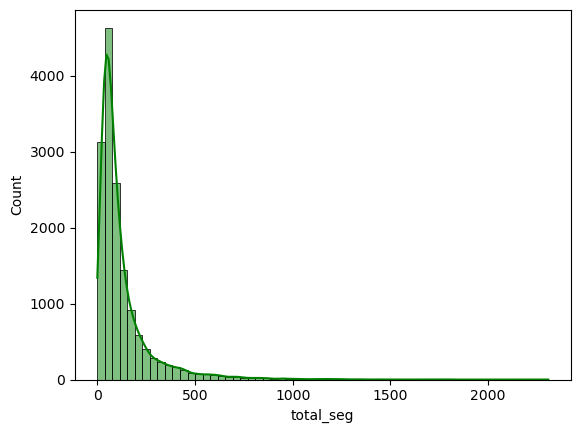

In [164]:
sns.histplot(df_web_control_dif_time34['total_seg'], kde=True, bins=60, color="green")
plt.show()

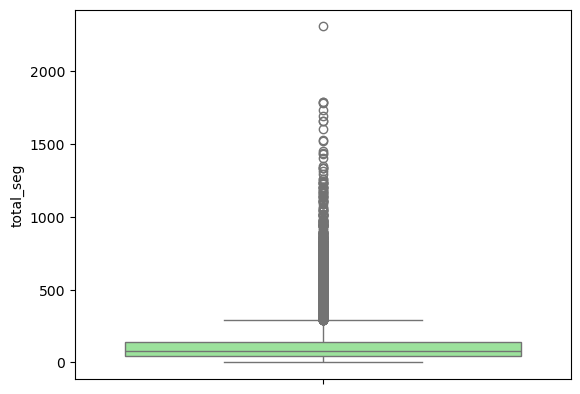

In [165]:
sns.boxplot(df_web_control_dif_time34['total_seg'], color="lightgreen")
plt.show()

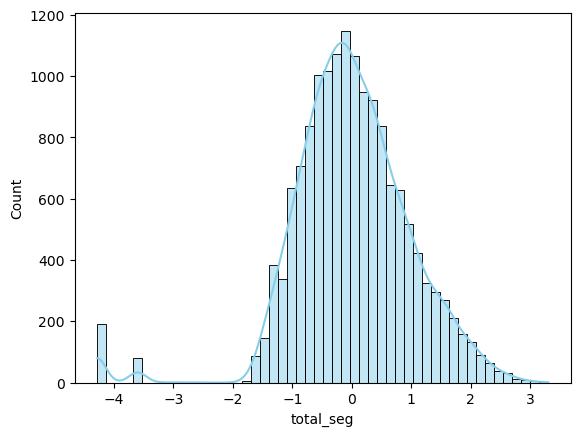

In [166]:
log_transformed_total_seg_cc34 = np.log1p(df_web_control_dif_time34['total_seg'])
standardized_log_total_seg_cc34 = (log_transformed_total_seg_cc34 - log_transformed_total_seg_cc34.mean()) / log_transformed_total_seg_cc34.std()

# Plotting histogram for transformed 'SalePrice'
sns.histplot(standardized_log_total_seg_cc34, kde=True, bins=50, color="skyblue")
plt.show()

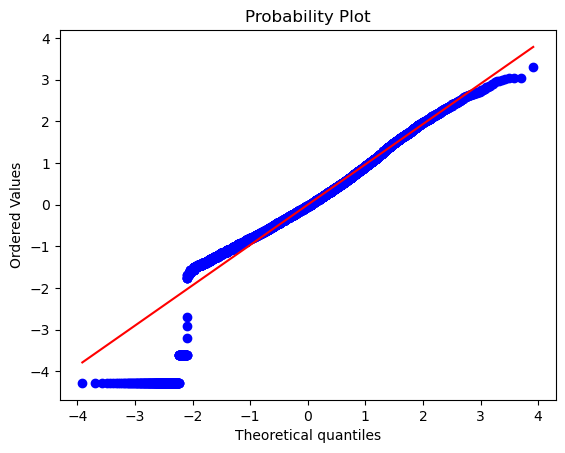

In [167]:
from scipy import stats
import statsmodels.api as sm
stats.probplot(standardized_log_total_seg_cc34, plot=plt);
plt.show()

In [168]:
# Conducting the Kolmogorov-Smirnov control on the log-transformed and standardized 'SalePrice'
ks_test_statistic_after_transformation, ks_p_value_after_transformation = stats.kstest(standardized_log_total_seg_cc34, 'norm')

ks_test_statistic_after_transformation, ks_p_value_after_transformation

(0.05759600755069107, 1.530235576633521e-44)

In [170]:
if ks_p_value_after_transformation < 0.05:
    print('The test results indicate that the distribution of seconds is significantly different from a normal distribution.')
else:
    print('The test results indicate that the distribution of seconds is not significantly different from a normal distribution.')

The test results indicate that the distribution of seconds is significantly different from a normal distribution.


In [172]:
shapiro_test_statistic, shapiro_p_value = stats.shapiro(log_transformed_total_seg_cc34)

shapiro_test_statistic, shapiro_p_value

C:\Users\Usuario\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 15294.
  res = hypotest_fun_out(*samples, **kwds)


(0.9348630599179446, 2.2109991079575756e-62)

## **Hypotesis test** 
**Total Completion Time**

In [181]:
#Two-sample t-test (one-tailed, "less").
# 0.05 significance level
# “The mean completion time for the test group is lower than the control.”
# Null Hypothesis: mean completion time, control =< mean completion time, test
# Alternative Hypothesis: mean completion time, control > mean completion time, test

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(log_transformed_total_seg, log_transformed_total_seg_ct, alternative="less")

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.10f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

T-statistic: -21.6127
P-value: 0.0000000000
Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.


## Step 0-1

In [191]:
#Two-sample t-test (one-tailed, "less").
# 0.05 significance level
# “The mean completion time for the test group is lower than the control.”
# Null Hypothesis: mean completion time, control < mean completion time, test
# Alternative Hypothesis: mean completion time, control > mean completion time, test

from scipy.stats import ttest_ind

t_stat01, p_value01 = ttest_ind(log_transformed_total_seg_ct01, log_transformed_total_seg_cc01, alternative="less")

print(f"T-statistic: {t_stat01:.4f}")
print(f"P-value: {p_value01:.10f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

T-statistic: -40.0813
P-value: 0.0000000000
Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.


## Step 1-2

In [194]:
#Two-sample t-test (one-tailed, "less").
# 0.05 significance level
# “The mean completion time for the test group is lower than the control.”
# Null Hypothesis: mean completion time, control < mean completion time, test
# Alternative Hypothesis: mean completion time, control > mean completion time, test

from scipy.stats import ttest_ind

t_stat01, p_value01 = ttest_ind(log_transformed_total_seg_ct12, log_transformed_total_seg_cc12, alternative="less")

print(f"T-statistic: {t_stat01:.4f}")
print(f"P-value: {p_value01:.10f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

T-statistic: 20.2266
P-value: 1.0000000000
Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.


## Step 2-3

In [197]:
#Two-sample t-test (one-tailed, "less").
# 0.05 significance level
# “The mean completion time for the test group is lower than the control.”
# Null Hypothesis: mean completion time, control < mean completion time, test
# Alternative Hypothesis: mean completion time, control > mean completion time, test

from scipy.stats import ttest_ind

t_stat01, p_value01 = ttest_ind(log_transformed_total_seg_ct23, log_transformed_total_seg_cc23, alternative="less")

print(f"T-statistic: {t_stat01:.4f}")
print(f"P-value: {p_value01:.10f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

T-statistic: 7.3753
P-value: 1.0000000000
Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.


## Step 3-4

In [200]:
#Two-sample t-test (one-tailed, "less").
# 0.05 significance level
# “The mean completion time for the test group is lower than the control.”
# Null Hypothesis: mean completion time, control < mean completion time, test
# Alternative Hypothesis: mean completion time, control > mean completion time, test

from scipy.stats import ttest_ind

t_stat01, p_value01 = ttest_ind(log_transformed_total_seg_ct34, log_transformed_total_seg_cc34, alternative="less")

print(f"T-statistic: {t_stat01:.4f}")
print(f"P-value: {p_value01:.10f}")

if p_value < 0.05:
    print("Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.")
else:
    print("Fail to reject the null hypothesis: No significant difference in means.")

T-statistic: -22.2068
P-value: 0.0000000000
Reject the null hypothesis: The test group has a significantly lower mean log-transformed value.


In [208]:
df_web_test_dif_time01["total_seg"].mean(), df_web_control_dif_time01["total_seg"].mean(), df_web_test_dif_time12["total_seg"].mean(), df_web_control_dif_time12["total_seg"].mean(), df_web_test_dif_time23["total_seg"].mean(), df_web_control_dif_time23["total_seg"].mean(), df_web_test_dif_time34["total_seg"].mean(), df_web_control_dif_time34["total_seg"].mean(),

(31.075392544648206,
 37.63839199099763,
 37.044888323951334,
 33.811890052824786,
 86.3944999587084,
 86.85265530356388,
 104.72423929018562,
 126.10219693997647)